In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_pickle("../data/data_clean.pkl")
n = df.shape[0]

In [6]:
def id_to_idx(id, df):
    return np.where(df.id == id)[0]


sims = np.zeros((n, n))
for r, row in tqdm(df.iterrows()):
    ids = row["info___related_calc_ids"]
    for id in ids:
        c = id_to_idx(id, df)
        sims[r, c] += 1

    # for c, col in df.iterrows():
    #     for key in [
    #         "categorization___chief_complaint",
    #         "categorization___specialty",
    #         "categorization___purpose",
    #         "categorization___system",
    #         "categorization___disease",
    #     ]:
    #         if row[key] == col[key]:
    #             sims[r, c] += 1


# average values across the diagonal
sims = (sims + sims.T) / 2

# set diagonal to 1
# np.fill_diagonal(sims, max(sims))

0it [00:00, ?it/s]

690it [00:00, 3502.04it/s]


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


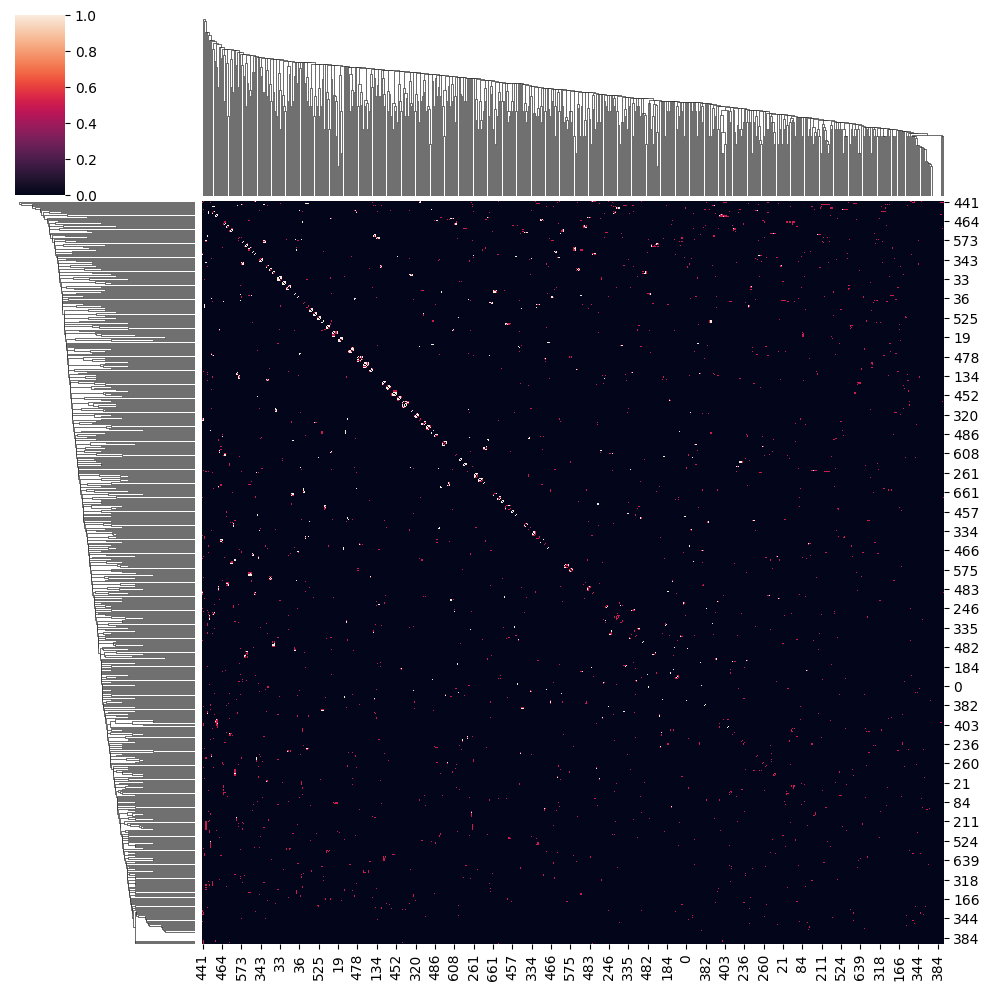

In [7]:
sns.clustermap(sims)